In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea


def predict(X, w):
    return X * w


def loss(X, Y, w):
    return np.average((predict(X, w) - Y) ** 2)


def train(X, Y, iterations, learning_rate):
    w = 0

    for i in range(iterations):
        current_loss = loss(X, Y, w)
        print("Iteration %4d => Loss: %.6f" % (i, current_loss))

        if loss(X, Y, w + learning_rate) < current_loss:
            w += learning_rate
        elif loss(X, Y, w - learning_rate) < current_loss:
            w -= learning_rate
        else:
            return w

    raise Exception("Couldn't converge within %d iterations" % iterations)


reservations, pizzas = np.loadtxt("pizza.txt", skiprows=1, unpack=True)

# Train the system
w = train(reservations, pizzas, 10000, 0.01)
print("\nw=%.3f" % w)

# Predict the number of pizzas
print("Prediction: x=%d => y=%.2f" % (20, predict(20, w)))


w=1.840
Prediction: x=21 => y=36.80


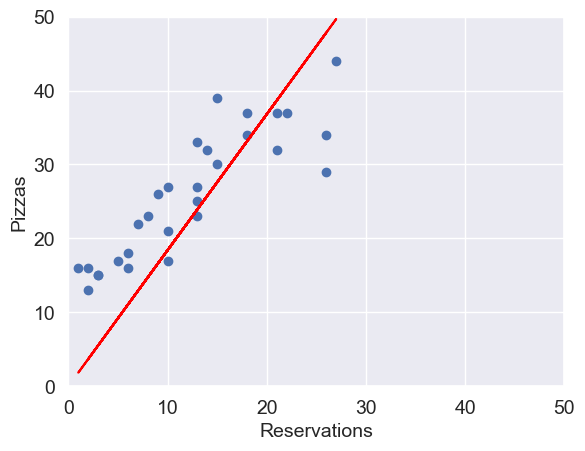

In [12]:
sea.set()
plt.axis([0., 50., 0., 50.])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Reservations", fontsize=14)
plt.ylabel("Pizzas", fontsize=14)
plt.plot(reservations, pizzas, "bo")
plt.plot(reservations, predict(reservations, w), color="red", label="Prediction")